In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,mean_squared_error,f1_score
import warnings
warnings.filterwarnings('ignore')

Importing the dataset.
-----------------------

In [2]:
df = pd.read_csv("flight_data.csv")

Following are the dataset details.
<ul text-align="justify">

<li>year - Year of Flight
<li>month - Month of Flight
<li>day - Day (number of Flight)
<li>dep_time - Departure Time
<li>sched_dep_time - Scheduled Departure Time
<li>dep_delay - Departure Delay (in Minutes)
<li>arr_time - Arrival Time
<li>sched_arr_time - Scheduled Arrival Time
<li>arr_delay - Arrival Delay (in Minutes)
<li>carrier- Carrier Details of Flight
<li>flight - Flight Name
<li>tailnum - Tailnumber of Flight
<li>origin - Origin of Flight
<li>dest - Destination Airport Name
<li>air_time - Air Time (Time in Air - travel Time ( in minutes) )
<li>distance - Distance (assuming in miles?)
<li>hour - Hour
<li>minute - minute
<li>time_hour - time hour

Data Preprocessing
-------------------------

In [3]:
df = df.drop(['time_hour'],axis = 1)

In [4]:
df.shape

(336776, 18)

In [5]:
df.isna().sum()

year                 0
month                0
day                  0
dep_time          8255
sched_dep_time       0
dep_delay         8255
arr_time          8713
sched_arr_time       0
arr_delay         9430
carrier              0
flight               0
tailnum           2512
origin               0
dest                 0
air_time          9430
distance             0
hour                 0
minute               0
dtype: int64

Applying the Simple Imputer Sklearn Method.
-------------------------------------------
Method applied to fill NAN Values with the mean values of the column.

In [6]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan,strategy = 'mean')
df = df.drop(['tailnum','year', 'sched_dep_time', 'sched_arr_time'],axis = 1)
imputer.fit(df[['dep_delay','arr_time','dep_time','air_time','arr_delay']])

SimpleImputer()

In [7]:
df[['dep_delay','arr_time','dep_time','air_time','arr_delay']] = imputer.transform(df[['dep_delay','arr_time','dep_time','air_time','arr_delay']])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 14 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   month      336776 non-null  int64  
 1   day        336776 non-null  int64  
 2   dep_time   336776 non-null  float64
 3   dep_delay  336776 non-null  float64
 4   arr_time   336776 non-null  float64
 5   arr_delay  336776 non-null  float64
 6   carrier    336776 non-null  object 
 7   flight     336776 non-null  int64  
 8   origin     336776 non-null  object 
 9   dest       336776 non-null  object 
 10  air_time   336776 non-null  float64
 11  distance   336776 non-null  int64  
 12  hour       336776 non-null  int64  
 13  minute     336776 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 36.0+ MB


In [9]:
df['dep_delay'] = df['dep_delay'].astype(int)
df['arr_delay'] = df['arr_delay'].astype(int)

In [10]:
df.shape

(336776, 14)

Exploratory Data Analysis(EDA)
---------------------------------

In [11]:
df.describe()

,month,day,dep_time,dep_delay,arr_time,arr_delay,flight,air_time,distance,hour,minute
count,336776.000000,336776.000000,336776.000000,336776.000000,336776.000000,336776.000000,336776.000000,336776.000000,336776.000000,336776.000000,336776.000000
mean,6.548510,15.710787,1349.109947,12.623405,1502.054999,6.870305,1971.923620,150.686460,1039.912604,13.180247,26.230100
std,3.414457,8.768607,482.260302,39.714314,526.320657,44.004217,1632.471938,92.367314,733.233033,4.661316,19.300846
min,1.000000,1.000000,1.000000,-43.000000,1.000000,-86.000000,1.000000,20.000000,17.000000,1.000000,0.000000
25%,4.000000,8.000000,915.000000,-5.000000,1110.000000,-16.000000,553.000000,84.000000,502.000000,9.000000,8.000000
50%,7.000000,16.000000,1349.109947,-1.000000,1518.000000,-4.000000,1496.000000,132.000000,872.000000,13.000000,29.000000
75%,10.000000,23.000000,1737.000000,12.000000,1934.000000,13.000000,3465.000000,188.000000,1389.000000,17.000000,44.000000
max,12.000000,31.000000,2400.000000,1301.000000,2400.000000,1272.000000,8500.000000,695.000000,4983.000000,23.000000,59.000000


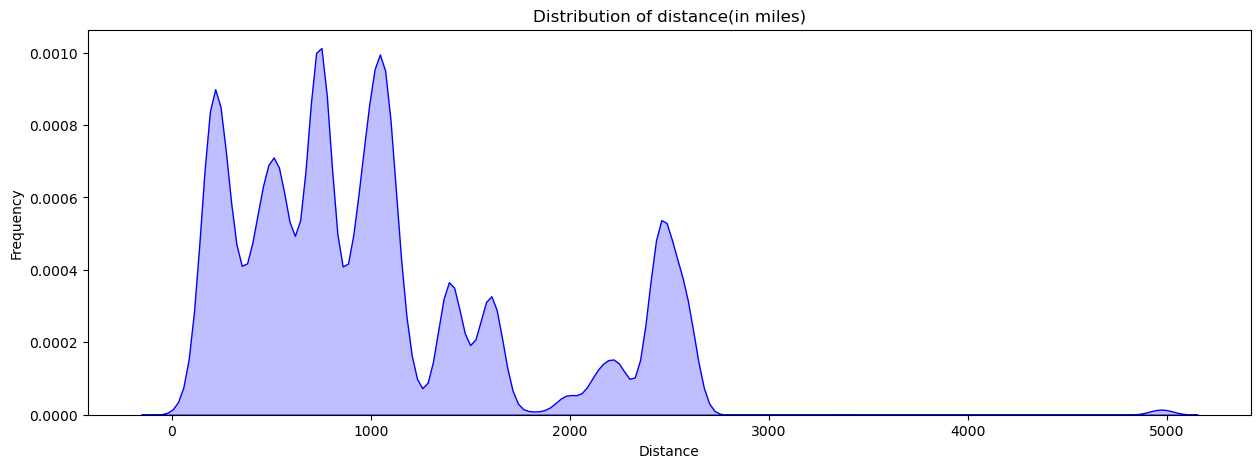

In [12]:
plt.figure(figsize=(15,5))
sns.distplot(df['distance'], hist=False, color="b", kde_kws={"shade": True})
plt.xlabel("Distance")
plt.ylabel("Frequency")
plt.title("Distribution of distance(in miles)")
plt.show()

Arrival delay

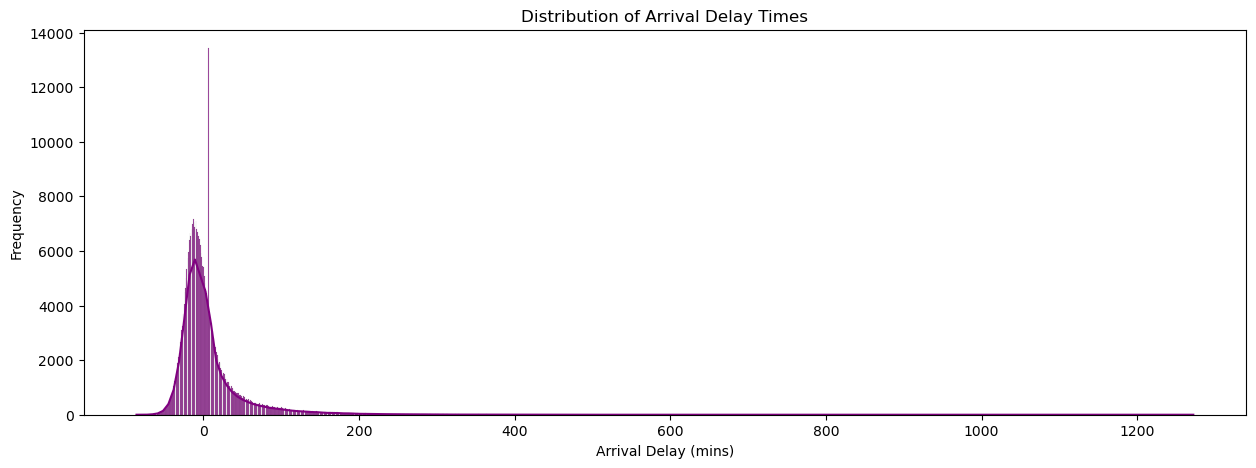

In [13]:
plt.figure(figsize=(15,5))
sns.histplot(data=df, x="arr_delay", kde=True, color="purple", alpha=.7)
plt.title('Distribution of Arrival Delay Times')
plt.xlabel('Arrival Delay (mins)')
plt.ylabel('Frequency')
plt.show()

Count of number of carriers in the dataset.

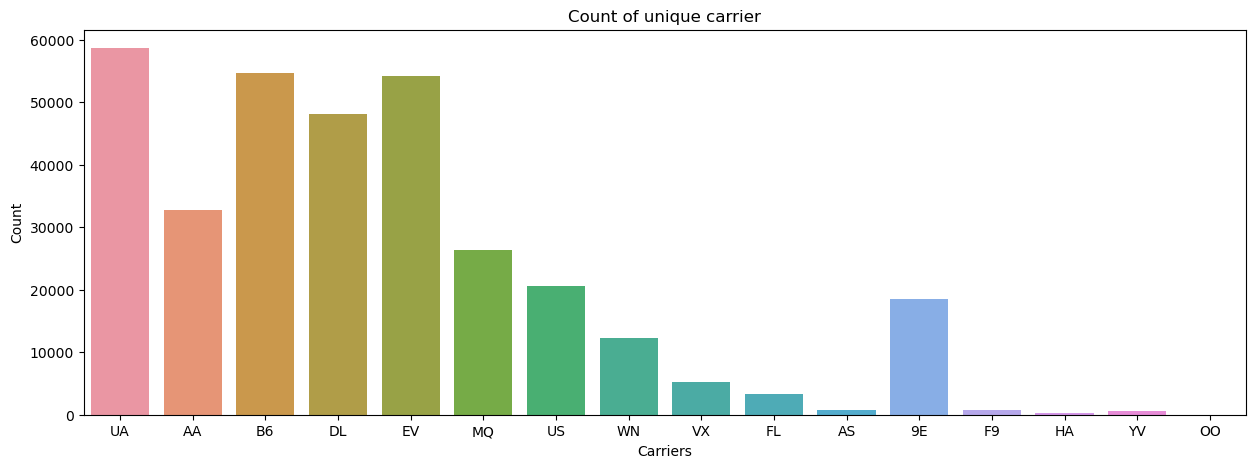

In [14]:
plt.figure(figsize=(15,5))
sns.countplot(x=df['carrier'], data=df)
plt.xlabel("Carriers")
plt.ylabel("Count")
plt.title("Count of unique carrier")
plt.show()

Average arrival delay per month.

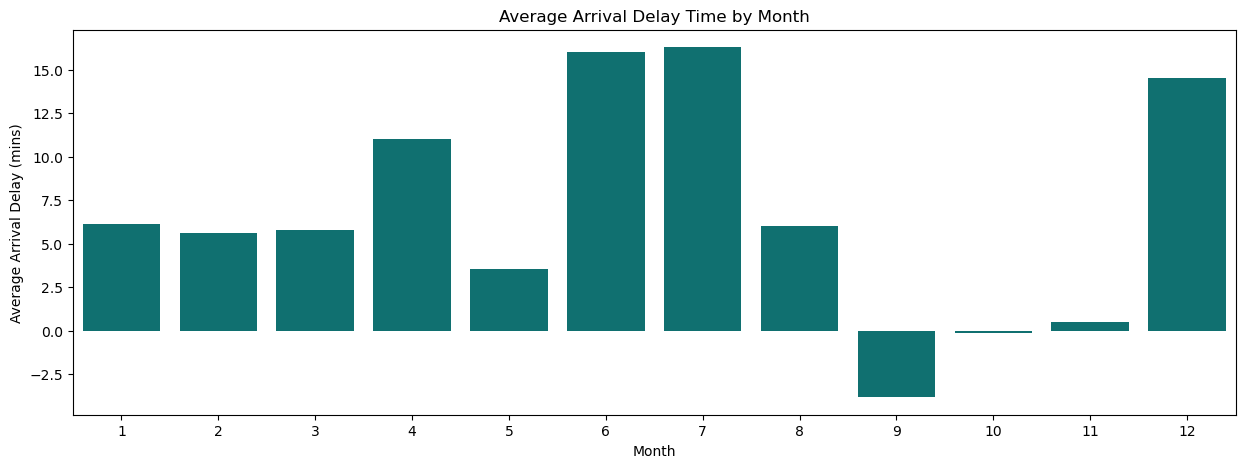

In [15]:
avg_arr_delay = df.groupby('month')['arr_delay'].mean()
plt.figure(figsize=(15,5))
sns.barplot(x=avg_arr_delay.index, y=avg_arr_delay.values, color="teal")
plt.title('Average Arrival Delay Time by Month')
plt.xlabel('Month')
plt.ylabel('Average Arrival Delay (mins)')
plt.show()

Total number of flights per month.

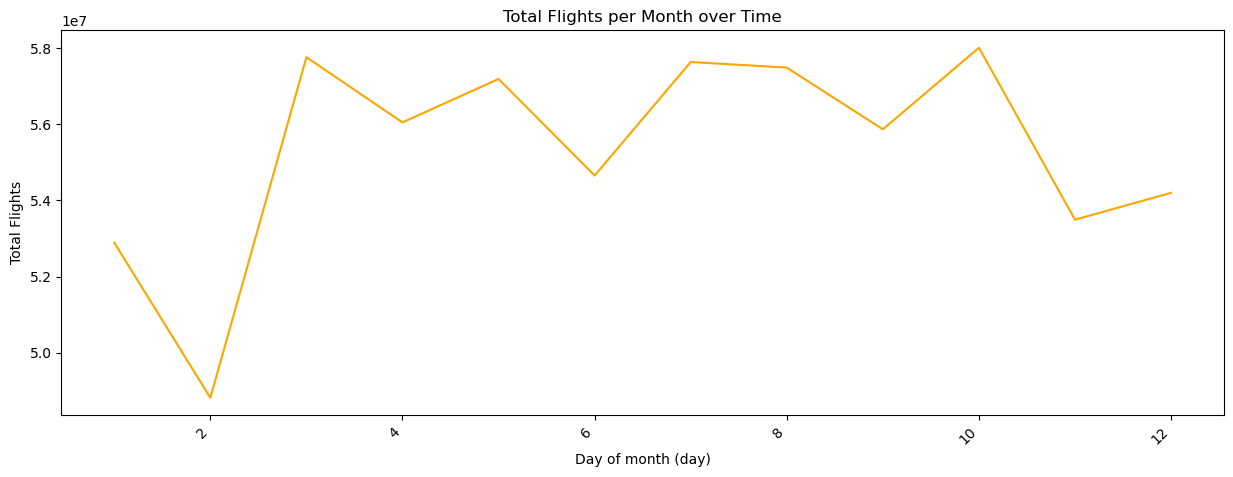

In [16]:
plt.figure(figsize=(15,5))
daily_flights = df.groupby('month')['flight'].sum()
sns.lineplot(x=daily_flights.index, y=daily_flights.values, color="orange")
plt.xticks(rotation=45,ha='right')
plt.title('Total Flights per Month over Time')
plt.xlabel('Day of month (day)')
plt.ylabel('Total Flights')
plt.show()

Correlation Heatmap.

<Axes: >

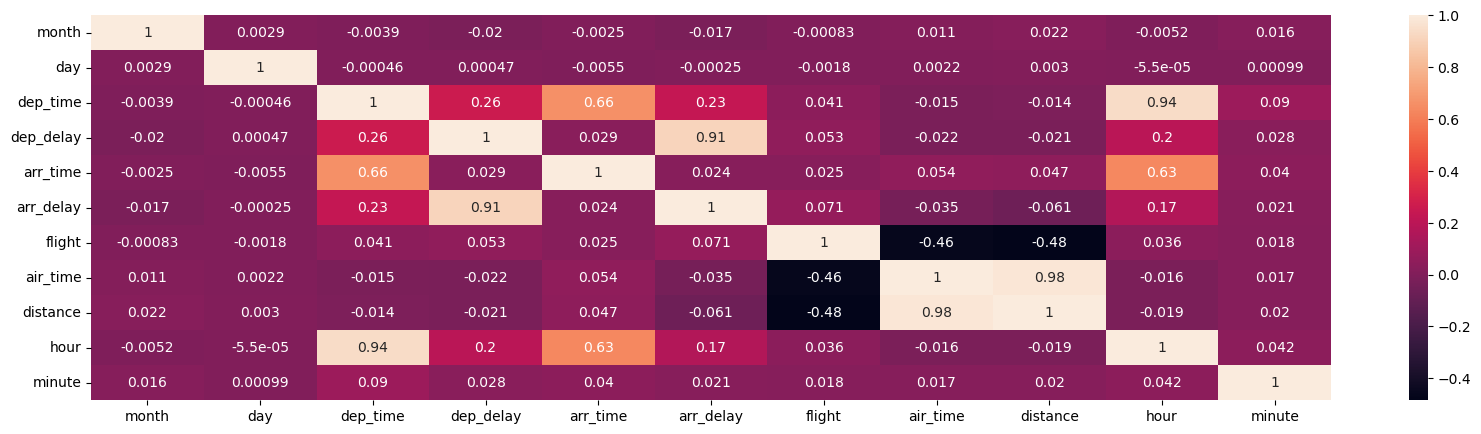

In [17]:
corr = df.corr()
plt.figure(figsize=(20,5))
sns.heatmap(corr, annot=True)

Relationship between arrival delay and departure delay.

<Figure size 1500x500 with 0 Axes>

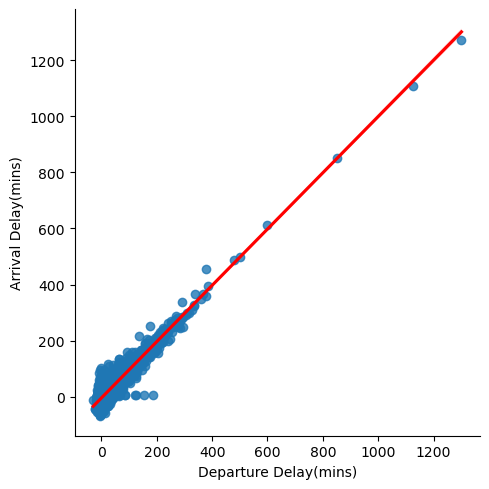

In [18]:
plt.figure(figsize=(15,5))
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
sns.lmplot(x='dep_delay', y='arr_delay', data=df.head(20000),line_kws={'color': 'red'})
plt.xlabel("Departure Delay(mins)")
plt.ylabel("Arrival Delay(mins)")
plt.show()

From the above scatter plot, we can see a linear relationship between arrival delay and departure delay.

Modelling
----------

In [19]:
df = df.rename(columns={'dep_delay':'Target'})

Encoding the categorical(string) variables

In this dataset, we have four categorical data.

1. carrier
2. tailnum
3. origin
4. dest

In [20]:
cat_cols = ['carrier', 'origin', 'dest']
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder() 
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

Feature Selection
------------------

In [21]:
corr = df.corr()
print(corr['Target'].sort_values(ascending=False))

Target       1.000000
arr_delay    0.909845
dep_time     0.260230
hour         0.195631
flight       0.053445
arr_time     0.028621
minute       0.028098
dest         0.005933
day          0.000465
carrier     -0.012577
month       -0.019726
distance    -0.021296
air_time    -0.022285
origin      -0.047889
Name: Target, dtype: float64


Encoding the departure delay
------------------------------
if >=0 :  means there is delay<br>
if <0 : means there is no delay. Flight arrived early.

In [22]:
df['Target'] = np.where(df['Target'] > 0, 1, df['Target'])
df['Target'] = np.where(df['Target'] < 0, 0, df['Target'])

Determining the features and target variable
-----------------------------------
Selecting some important features from the correlation mapped above.

In [23]:
X = df[['carrier','origin','dest','distance','hour','day','month']]
y = df['Target']

Splitting the train-set and test-set
------------------------------------

In [24]:
# Splitting Train-set and Test-set
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=41)

In [25]:
df

,month,day,dep_time,Target,arr_time,arr_delay,carrier,flight,origin,dest,air_time,distance,hour,minute
0,1,1,517.000000,1,830.000000,11,11,1545,0,43,227.00000,1400,5,15
1,1,1,533.000000,1,850.000000,20,11,1714,2,43,227.00000,1416,5,29
2,1,1,542.000000,1,923.000000,33,1,1141,1,58,160.00000,1089,5,40
3,1,1,544.000000,0,1004.000000,-18,3,725,1,12,183.00000,1576,5,45
4,1,1,554.000000,0,812.000000,-25,4,461,2,4,116.00000,762,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,9,30,1349.109947,1,1502.054999,6,0,3393,1,28,150.68646,213,14,55
336772,9,30,1349.109947,1,1502.054999,6,0,3525,2,99,150.68646,198,22,0
336773,9,30,1349.109947,1,1502.054999,6,9,3461,2,10,150.68646,764,12,10
336774,9,30,1349.109947,1,1502.054999,6,9,3572,2,22,150.68646,419,11,59


Creating some baseline models.
--------------------------------

Logistic Regression.
---------------------

In [26]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
accuracy_lr = accuracy_score(y_test,y_pred_lr)
mse_lr = mean_squared_error(y_test,y_pred_lr)
f1_lr = f1_score(y_test,y_pred_lr)

Naive Bayes
----------------

In [27]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)
accuracy_gnb = accuracy_score(y_test,y_pred_gnb)
mse_gnb = mean_squared_error(y_test,y_pred_gnb)
f1_gnb = f1_score(y_test,y_pred_gnb)

Random Forest Classifier
------------------------

In [28]:
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)
y_pred_rfc = rf.predict(X_test)
accuracy_rfc = accuracy_score(y_test,y_pred_rfc)
mse_rfc = mean_squared_error(y_test,y_pred_rfc)
f1_rfc = f1_score(y_test,y_pred_rfc)

In [29]:
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

K-Nearest Neighbour
-------------------

In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

Hyper-parameter Tuning of KNN
-----------------------------

In [31]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Best hyperparameters:", grid_search.best_params_)
print("Accuracy on testing set:", acc)

Best hyperparameters: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
Accuracy on testing set: 0.6466981412197874


In [32]:
knn = KNeighborsClassifier(n_neighbors=7,weights='distance',metric='manhattan')
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test,y_pred_knn)
mse_knn = mean_squared_error(y_test,y_pred_knn)
f1_knn = f1_score(y_test,y_pred_knn)

Evaluation of accuracy on the dataset.
-------------------------------------

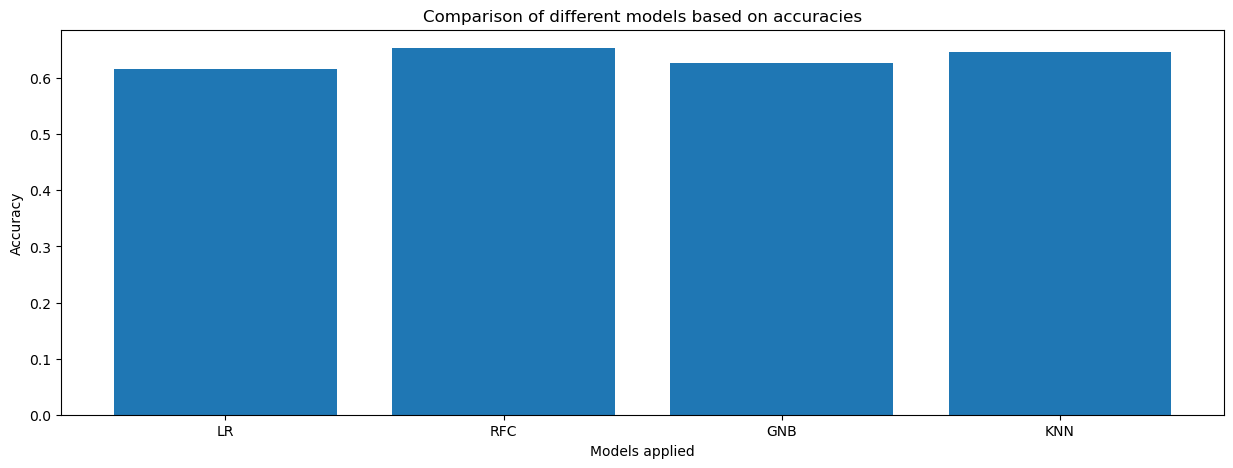

In [33]:
import plotly.express as px
models = ['LR','RFC','GNB','KNN']
accuracies = [accuracy_lr,accuracy_rfc,accuracy_gnb,accuracy_knn]
plt.figure(figsize=(15,5))
plt.title("Comparison of different models based on accuracies")
plt.xlabel("Models applied")
plt.ylabel("Accuracy")
plt.bar(models,accuracies)
plt.show()

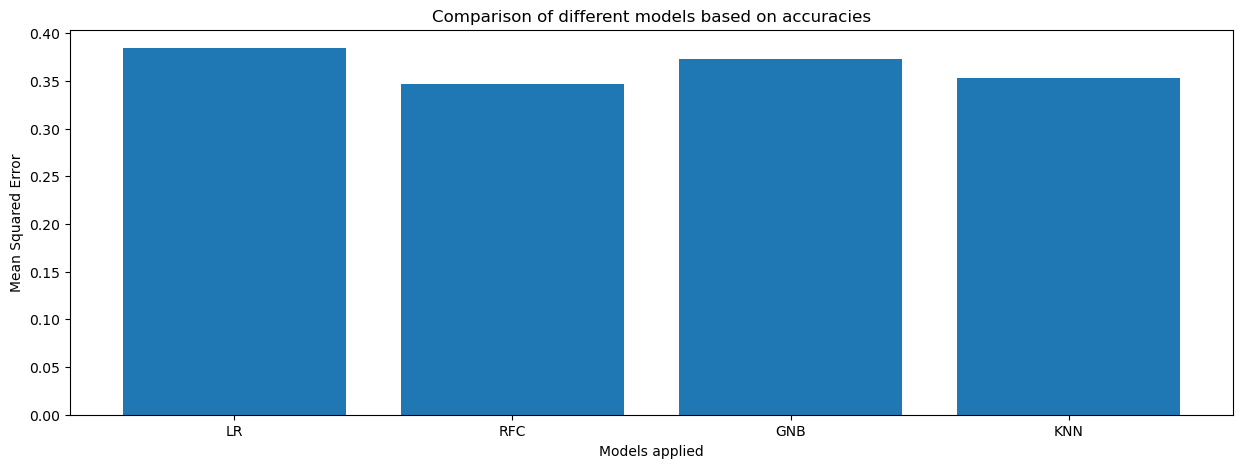

In [34]:
models = ['LR','RFC','GNB','KNN']
accuracies = [mse_lr,mse_rfc,mse_gnb,mse_knn]
plt.figure(figsize=(15,5))
plt.title("Comparison of different models based on accuracies")
plt.xlabel("Models applied")
plt.ylabel("Mean Squared Error")
plt.bar(models,accuracies)
plt.show()

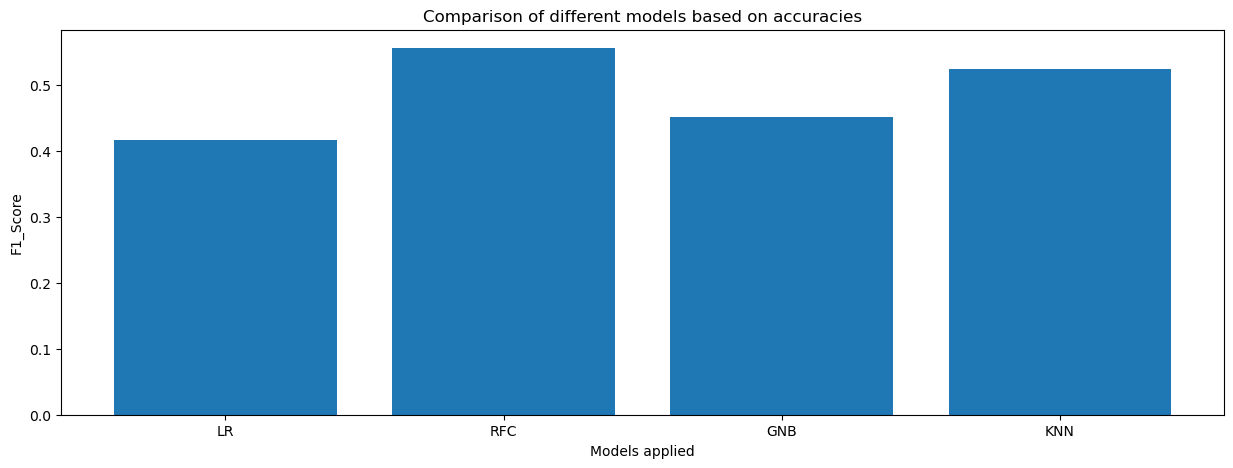

In [35]:
models = ['LR','RFC','GNB','KNN']
accuracies = [f1_lr,f1_rfc,f1_gnb,f1_knn]
plt.figure(figsize=(15,5))
plt.title("Comparison of different models based on accuracies")
plt.xlabel("Models applied")
plt.ylabel("F1_Score")
plt.bar(models,accuracies)
plt.show()

Metrics Dataframe
-----------------

In [36]:
results = {'Model': ['Logistic Regression', 'Random Forest Classifier', 'Gaussian Naive Bayes','K-Nearest Neighbours'],
           'Accuracy': [accuracy_lr,accuracy_rfc, accuracy_gnb,accuracy_knn],
           'MSE': [mse_lr, mse_rfc, mse_gnb,mse_knn],
           'F1 Score': [f1_lr, f1_rfc, f1_gnb,f1_knn]}

df_results = pd.DataFrame(results)
df_results

,Model,Accuracy,MSE,F1 Score
0,Logistic Regression,0.615669,0.384331,0.416526
1,Random Forest Classifier,0.653765,0.346235,0.556509
2,Gaussian Naive Bayes,0.626834,0.373166,0.451452
3,K-Nearest Neighbours,0.646698,0.353302,0.524507


Saving the model and encoders in .pkl format
--------------------------------------------

In [39]:
pip install streamlit

  Using cached gitdb-4.0.11-py3-none-any.whl.metadata (1.2 kB)
  Using cached markdown_it_py-3.0.0-py3-none-any.whl.metadata (6.9 kB)
  Using cached smmap-5.0.1-py3-none-any.whl.metadata (4.3 kB)
   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
    --------------------------------------- 0.1/8.7 MB 3.3 MB/s eta 0:00:03
   - -------------------------------------- 0.3/8.7 MB 3.2 MB/s eta 0:00:03
   - -------------------------------------- 0.4/8.7 MB 2.9 MB/s eta 0:00:03
   -- ------------------------------------- 0.6/8.7 MB 2.9 MB/s eta 0:00:03
   --- ------------------------------------ 0.7/8.7 MB 3.2 MB/s eta 0:00:03
   ---- ----------------------------------- 0.9/8.7 MB 3.1 MB/s eta 0:00:03
   ---- ----------------------------------- 1.1/8.7 MB 3.2 MB/s eta 0:00:03
   ----- ---------------------------------- 1.2/8.7 MB 3.2 MB/s eta 0:00:03
   ------ --------------------------------- 1.4/8.7 MB 3.1 MB/s eta 0:00:03
   ------- -------------------------------- 1.5/8.7

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [40]:
import streamlit as st
st.write("Model Accuracy:",accuracy_rfc)

2024-09-01 22:30:11.609 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-01 22:30:12.224 
  command:

    streamlit run c:\Users\A R Taqi\anaconda3\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2024-09-01 22:30:12.224 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-01 22:30:12.240 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-01 22:30:12.241 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [41]:
import joblib
joblib.dump(rf, 'flight_model.pkl')
joblib.dump(label_encoders, 'encoders.pkl')

['encoders.pkl']